# Amazon Product Recommender System

## Objective Of This Project

The aim of this project is to build a model with simple User Interface that recommends products to users based on user based collaborative filtering system. The model is integrated with a web application. Based on the user ID, the app recommends the n top products based on the category chosen.

## Sub Objectives/ ML Techniques

1. Collaborative filtering for user based similarity detection and recommendation of top n products based on it. 

2. Popularity based recommendation for new users 

## User Flow

### Home Page:

The homepage displays a prompt to input the User ID.

Based on the user id entered: The model is capable of dealing with frequent users and the cold start problem.

### Frequent users:

If the user id entered exists in database, then based on the category chosen, the top n products in that category are listed out. 

These n products are chosen after collaborative filtering is performed on the ratings givenn by these users for the items that they had purchsed previously.

### Cold Start Problem:

In case the user id entered does not previously exist in the database i.e., the user is a new user, we are faced with the challenge of having no previous records or footprints from the user. 

In such a case, based on the category chosen by the user, we display the top- n popular products in the category by popularity based recommendation.

This list of popular products comprises of the products which have the highest positive rating( as given by other users).

## Data Sources And Categories Chosen

The data has been procured from http://snap.stanford.edu/data/web-Amazon-links.html

### Categories Chosen Are:

1. Musical Instruments

2. Patio,Lawn and Garden

3. Baby

4. Digital Music

5. Amazon Instant Video

## Metadata

Each of the above 5 categories data has been loaded into pandas dataframes from csv format. It has 4 columns as listed below:

User_ID: String Type data- Amazon's unique user id for customer identification

Item_ID: Numeric Type data- Amazon's unique product identification code for each product 

Rating: Categorical Type Data- Ranging from 1 to 5 based on customer satisfaction

Timestamp: Numeric Type data(redundant column , not used for analysis)(redundant column, not used for analysis)- time when the prouct was purchased


## Tech Stacks

The tech stacks(libraries) that I aim to utilize to build this project are: 

1. Pandas

2. Seaborn

3. Numpy

4. Matplotlib 

5. Sklearn

6. Scipy

7. Surprise library for collaborative filtering 

8. Fast API for deployment of model

9. Flutter for client side rendering 

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

## Creation of Dataframes

In [2]:
df_1= pd.read_csv('ratings_Amazon_Instant_Video.csv')
df_1.columns=['User_ID','Item_ID','Rating','Timestamp']

In [3]:
df_1.head()

,User_ID,Item_ID,Rating,Timestamp
0,AGZ8SM1BGK3CK,B000GFDAUG,5.0,1198195200
1,A2VHZ21245KBT7,B000GIOPK2,4.0,1215388800
2,ACX8YW2D5EGP6,B000GIOPK2,4.0,1185840000
3,A9RNMO9MUSMTJ,B000GIOPK2,2.0,1281052800
4,A3STFVPM8NHJ7B,B000GIOPK2,5.0,1203897600


In [4]:
df_2=pd.read_csv('ratings_Digital_Music.csv')
df_2.columns=['User_ID','Item_ID','Rating','Timestamp']

In [5]:
df_2.head()

,User_ID,Item_ID,Rating,Timestamp
0,A1WR23ER5HMAA9,5555991584,5.0,953424000
1,A2IR4Q0GPAFJKW,5555991584,4.0,1393545600
2,A2V0KUVAB9HSYO,5555991584,4.0,966124800
3,A1J0GL9HCA7ELW,5555991584,5.0,1007683200
4,A3EBHHCZO6V2A4,5555991584,5.0,1158019200


In [6]:
df_3=pd.read_csv('ratings_Musical_Instruments.csv')
df_3.columns=['User_ID','Item_ID','Rating','Timestamp']

In [7]:
df_3.head()

,User_ID,Item_ID,Rating,Timestamp
0,A3TS466QBAWB9D,0014072149,5.0,1370476800
1,A3BUDYITWUSIS7,0041291905,5.0,1381708800
2,A19K10Z0D2NTZK,0041913574,5.0,1285200000
3,A14X336IB4JD89,0201891859,1.0,1350432000
4,A2HR0IL3TC4CKL,0577088726,5.0,1371168000


In [8]:
df_4=pd.read_csv('ratings_Patio_Lawn_and_Garden.csv')
df_4.columns=['User_ID','Item_ID','Rating','Timestamp']

In [9]:
df_4.head()

,User_ID,Item_ID,Rating,Timestamp
0,A20DWVV8HML3AW,0981850006,5.0,1371081600
1,A3RVP3YBYYOPRH,0981850006,5.0,1257984000
2,A28XY55TP3Q90O,0981850006,5.0,1314144000
3,A3VZW1BGUQO0V3,0981850006,5.0,1308268800
4,A2R9T5D7UVQZB0,0981850006,5.0,1253577600


In [10]:
df_5=pd.read_csv('ratings_Baby.csv')
df_5.columns=['User_ID','Item_ID','Rating','Timestamp']

In [11]:
df_5.head()

,User_ID,Item_ID,Rating,Timestamp
0,AX0M1Z6ZWO52J,0188399399,5.0,1365465600
1,A1KD7N84L7NIUT,0188399518,4.0,1392336000
2,A29CUDEIF4X1UO,0188399518,3.0,1373241600
3,A32592TYN6C9EM,0316967297,4.0,1378425600
4,AA9X14MODL8XJ,0316967297,5.0,1363910400


In [12]:
df_1.shape

(583932, 4)

In [13]:
df_2.shape

(836005, 4)

In [14]:
df_3.shape

(500175, 4)

In [15]:
df_4.shape

(993489, 4)

In [16]:
df_5.shape

(915445, 4)

In [17]:
df_1.dtypes


User_ID       object
Item_ID       object
Rating       float64
Timestamp      int64
dtype: object

In [18]:
df_2.dtypes

User_ID       object
Item_ID       object
Rating       float64
Timestamp      int64
dtype: object

In [19]:
df_3.dtypes

User_ID       object
Item_ID       object
Rating       float64
Timestamp      int64
dtype: object

In [20]:
df_4.dtypes

User_ID       object
Item_ID       object
Rating       float64
Timestamp      int64
dtype: object

In [21]:
df_5.dtypes

User_ID       object
Item_ID       object
Rating       float64
Timestamp      int64
dtype: object

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583932 entries, 0 to 583931
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    583932 non-null  object 
 1   Item_ID    583932 non-null  object 
 2   Rating     583932 non-null  float64
 3   Timestamp  583932 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 17.8+ MB


In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836005 entries, 0 to 836004
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    836005 non-null  object 
 1   Item_ID    836005 non-null  object 
 2   Rating     836005 non-null  float64
 3   Timestamp  836005 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 25.5+ MB


In [24]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500175 entries, 0 to 500174
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    500175 non-null  object 
 1   Item_ID    500175 non-null  object 
 2   Rating     500175 non-null  float64
 3   Timestamp  500175 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [25]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993489 entries, 0 to 993488
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    993489 non-null  object 
 1   Item_ID    993489 non-null  object 
 2   Rating     993489 non-null  float64
 3   Timestamp  993489 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 30.3+ MB


In [26]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915445 entries, 0 to 915444
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    915445 non-null  object 
 1   Item_ID    915445 non-null  object 
 2   Rating     915445 non-null  float64
 3   Timestamp  915445 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 27.9+ MB


## 5 Point Summary 

In [27]:
df_1.describe()['Rating'].T

count    583932.000000
mean          4.316184
std           1.163707
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [28]:
df_2.describe()['Rating'].T

count    836005.000000
mean          4.540249
std           0.958878
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [29]:
df_3.describe()['Rating'].T

count    500175.000000
mean          4.244352
std           1.203374
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [30]:
df_4.describe()['Rating'].T

count    993489.000000
mean          4.006400
std           1.400496
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [31]:
df_5.describe()['Rating'].T

count    915445.000000
mean          4.117694
std           1.289458
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

## Missing value analysis

In [32]:
print('Number of missing values across columns in Digital Music: \n',df_1.isnull().sum())

Number of missing values across columns in Digital Music: 
 User_ID      0
Item_ID      0
Rating       0
Timestamp    0
dtype: int64


In [33]:
print('Number of missing values across columns in Digital Music: \n',df_2.isnull().sum())

Number of missing values across columns in Digital Music: 
 User_ID      0
Item_ID      0
Rating       0
Timestamp    0
dtype: int64


In [34]:
print('Number of missing values across columns in Musical Instruments: \n',df_3.isnull().sum())

Number of missing values across columns in Musical Instruments: 
 User_ID      0
Item_ID      0
Rating       0
Timestamp    0
dtype: int64


In [35]:
print('Number of missing values across columns in Patio,Lawn and garden: \n',df_4.isnull().sum())

Number of missing values across columns in Patio,Lawn and garden: 
 User_ID      0
Item_ID      0
Rating       0
Timestamp    0
dtype: int64


In [36]:
print('Number of missing values across columns in Baby: \n',df_5.isnull().sum())

Number of missing values across columns in Baby: 
 User_ID      0
Item_ID      0
Rating       0
Timestamp    0
dtype: int64


## Dropping the timestamp column

In [37]:
df_1.drop(['Timestamp'], axis=1,inplace=True)

In [38]:
df_2.drop(['Timestamp'], axis=1,inplace=True)

In [39]:
df_3.drop(['Timestamp'], axis=1,inplace=True)

In [40]:
df_4.drop(['Timestamp'], axis=1,inplace=True)

In [41]:
df_5.drop(['Timestamp'], axis=1,inplace=True)

## Visualisation of Rating

C:\Users\priya\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


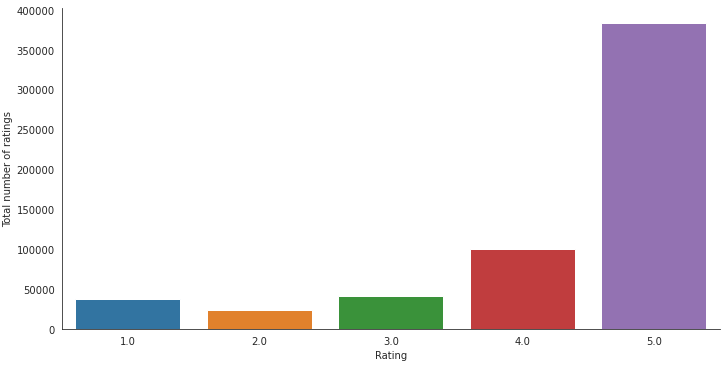

In [42]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df_1, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

C:\Users\priya\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


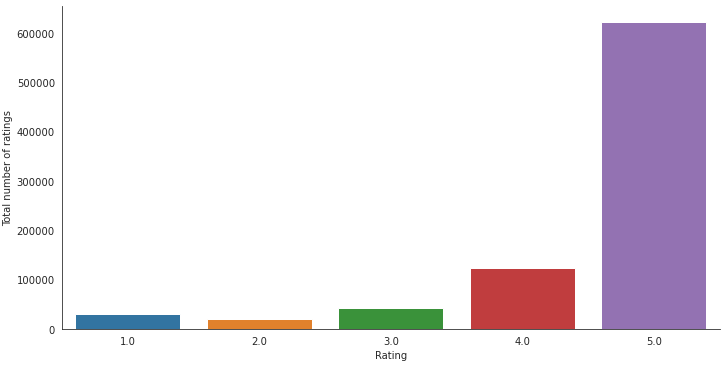

In [43]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df_2, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

C:\Users\priya\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


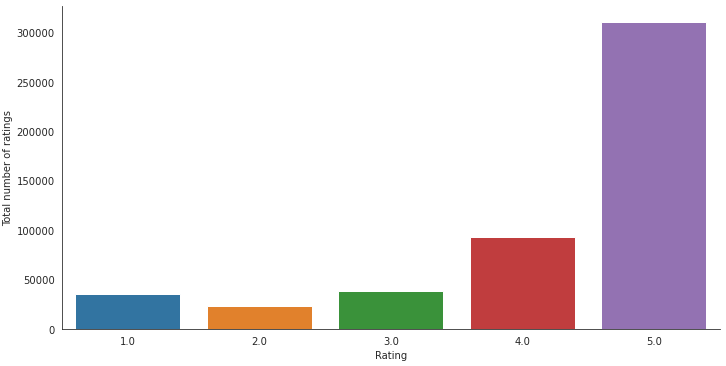

In [44]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df_3, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

C:\Users\priya\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


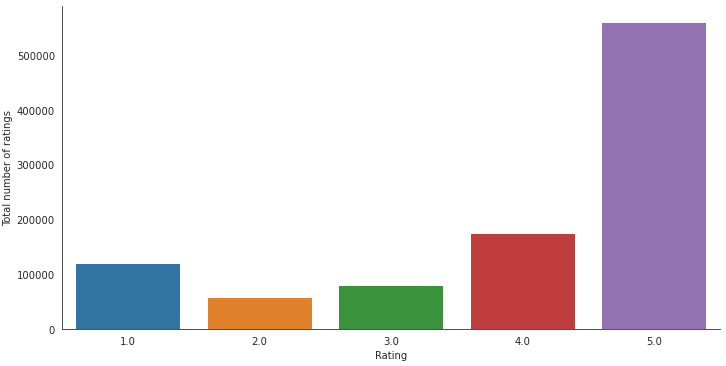

In [45]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df_4, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

C:\Users\priya\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


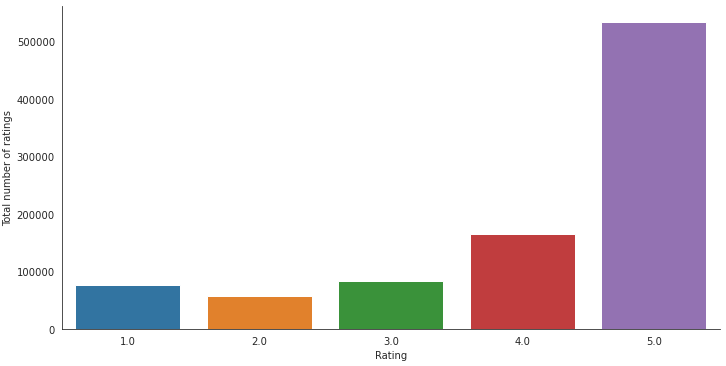

In [46]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=df_5, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

## Checking for duplicate values

In [47]:
df_1.duplicated(subset=None, keep='first').sum()

0

In [48]:
df_2.duplicated(subset=None, keep='first').sum()

0

In [49]:
df_3.duplicated(subset=None, keep='first').sum()

0

In [50]:
df_4.duplicated(subset=None, keep='first').sum()

0

In [51]:
df_5.duplicated(subset=None, keep='first').sum()

0

## Unique Users and Products

In [52]:
print("Total data ")

print("\nTotal no of ratings :",df_1.shape[0])
print("Total No of Users   :", len(np.unique(df_1.User_ID)))
print("Total No of products  :", len(np.unique(df_1.Item_ID)))

Total data 

Total no of ratings : 583932
Total No of Users   : 426921
Total No of products  : 23965


In [53]:
print("Total data ")

print("\nTotal no of ratings :",df_2.shape[0])
print("Total No of Users   :", len(np.unique(df_2.User_ID)))
print("Total No of products  :", len(np.unique(df_2.Item_ID)))

Total data 

Total no of ratings : 836005
Total No of Users   : 478235
Total No of products  : 266414


In [54]:
print("Total data ")

print("\nTotal no of ratings :",df_3.shape[0])
print("Total No of Users   :", len(np.unique(df_3.User_ID)))
print("Total No of products  :", len(np.unique(df_3.Item_ID)))

Total data 

Total no of ratings : 500175
Total No of Users   : 339231
Total No of products  : 83045


In [55]:
print("Total data ")

print("\nTotal no of ratings :",df_4.shape[0])
print("Total No of Users   :", len(np.unique(df_4.User_ID)))
print("Total No of products  :", len(np.unique(df_4.Item_ID)))

Total data 

Total no of ratings : 993489
Total No of Users   : 714790
Total No of products  : 105984


In [56]:
print("Total data ")

print("\nTotal no of ratings :",df_5.shape[0])
print("Total No of Users   :", len(np.unique(df_5.User_ID)))
print("Total No of products  :", len(np.unique(df_5.Item_ID)))

Total data 

Total no of ratings : 915445
Total No of Users   : 531890
Total No of products  : 64425


## Analyzing Ratings

In [57]:
no_of_rated_products_per_user_1 = df_1.groupby(by='User_ID')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user_1.head()

User_ID
A27H9DOUGY9FOS    277
AV6QDP8Q0ONK4     240
A3EDIPCXT15C3T    212
AW3VZ5O895LRK     142
AIMR915K4YCN      125
Name: Rating, dtype: int64

In [58]:
no_of_rated_products_per_user_2 = df_2.groupby(by='User_ID')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user_2.head()

User_ID
A3W4D8XOGLWUN5    1126
A9Q28YTLYREO7      713
ABDR6IJ93HFIO      489
A3HU0B9XUEVHIM     471
A1GN8UJIZLCA59     427
Name: Rating, dtype: int64

In [59]:
no_of_rated_products_per_user_3 = df_3.groupby(by='User_ID')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user_3.head()

User_ID
A2PAD826IH1HFE    483
A2AIMXT9PLAM12    463
A2NYK9KWFMJV4Y    454
A33GGROUQRQZS     154
A2PR6NXG0PA3KY    135
Name: Rating, dtype: int64

In [60]:
no_of_rated_products_per_user_4 = df_4.groupby(by='User_ID')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user_4.head()

User_ID
A100WO06OQR8BQ    161
A3HPCRD9RX351S    131
A3OXRFCJI67IMN    120
A2REQUI85URT87     95
A25C2M3QF9G7OQ     81
Name: Rating, dtype: int64

In [61]:
no_of_rated_products_per_user_5 = df_5.groupby(by='User_ID')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user_5.head()

User_ID
ARIFCL50JD5SK     155
AJGU56YG8G1DQ     140
AF8SREA2XE7BJ     122
AJC88791BZEW7     105
A276OI0NHBYORX     95
Name: Rating, dtype: int64

In [62]:
no_of_rated_products_per_user_1.describe()

count    426921.000000
mean          1.367775
std           1.500765
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         277.000000
Name: Rating, dtype: float64

In [63]:
no_of_rated_products_per_user_2.describe()

count    478235.000000
mean          1.748105
std           4.227086
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1126.000000
Name: Rating, dtype: float64

In [64]:
no_of_rated_products_per_user_3.describe()

count    339231.000000
mean          1.474438
std           2.342603
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         483.000000
Name: Rating, dtype: float64

In [65]:
no_of_rated_products_per_user_4.describe()

count    714790.000000
mean          1.389903
std           1.314259
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         161.000000
Name: Rating, dtype: float64

In [66]:
no_of_rated_products_per_user_5.describe()

count    531890.000000
mean          1.721117
std           2.158475
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         155.000000
Name: Rating, dtype: float64

## Top 20 users based on count of orders placed

In [67]:
a = list(df_1['User_ID'].value_counts())
b = list(df_1['User_ID'].unique())
top_20_Users1 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['User_ID', 'Count'])
top_20_Users1

,User_ID,Count
0,AGZ8SM1BGK3CK,277
1,A2VHZ21245KBT7,240
2,ACX8YW2D5EGP6,212
3,A9RNMO9MUSMTJ,142
4,A3STFVPM8NHJ7B,125
5,A2582KMXLK2P06,99
6,A1TZCLCW9QGGBH,93
7,A2E2I6B878CRMA,92
8,AD5MZA8SOVMPJ,88
9,A3IE1M3QVUKIJN,84


In [68]:
a = list(df_2['User_ID'].value_counts())
b = list(df_2['User_ID'].unique())
top_20_Users2 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['User_ID', 'Count'])
top_20_Users2

,User_ID,Count
0,A1WR23ER5HMAA9,1126
1,A2IR4Q0GPAFJKW,713
2,A2V0KUVAB9HSYO,489
3,A1J0GL9HCA7ELW,471
4,A3EBHHCZO6V2A4,427
5,A340XJYJDFSMUG,409
6,A3Q1J7VFGG80EK,347
7,A1REP2FMPOXV4A,343
8,A3QEKUPBPQ7A2S,339
9,A4BHT5EUI0ZJF,318


In [69]:
a = list(df_3['User_ID'].value_counts())
b = list(df_3['User_ID'].unique())
top_20_Users3 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['User_ID', 'Count'])
top_20_Users3

,User_ID,Count
0,A3TS466QBAWB9D,483
1,A3BUDYITWUSIS7,463
2,A19K10Z0D2NTZK,454
3,A14X336IB4JD89,154
4,A2HR0IL3TC4CKL,135
5,A2DHYD72O52WS5,126
6,A1MUVHT8BONL5K,118
7,A15GZQZWKG6KZM,114
8,A16WE7UU0QD33D,113
9,AXMWZYP2IROMP,110


In [70]:
a = list(df_4['User_ID'].value_counts())
b = list(df_4['User_ID'].unique())
top_20_Users4 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['User_ID', 'Count'])
top_20_Users4

,User_ID,Count
0,A20DWVV8HML3AW,161
1,A3RVP3YBYYOPRH,131
2,A28XY55TP3Q90O,120
3,A3VZW1BGUQO0V3,95
4,A2R9T5D7UVQZB0,81
5,A2MH49GAEWEI95,79
6,AR5DPX4ZU3D4Z,78
7,A3OGMCRM3NL8OM,73
8,A7E1GKNNT96QQ,70
9,A1NCJWD2ZQBXW2,70


In [71]:
a = list(df_5['User_ID'].value_counts())
b = list(df_5['User_ID'].unique())
top_20_Users5 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['User_ID', 'Count'])
top_20_Users5

,User_ID,Count
0,AX0M1Z6ZWO52J,155
1,A1KD7N84L7NIUT,140
2,A29CUDEIF4X1UO,122
3,A32592TYN6C9EM,105
4,AA9X14MODL8XJ,95
5,AHAWBFF74JFGM,93
6,A3N6R7ONCCY2D,82
7,A1Y9UZAZHG0P5A,81
8,ATTTLHRK3VOOL,81
9,A3BRNASAP5PDFZ,81


## Top products based on sales

In [72]:
a = list(df_1['Item_ID'].value_counts())
b = list(df_1['Item_ID'].unique())
top_20_products_1 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['Item_ID', 'Count'])
top_20_products_1

,Item_ID,Count
0,B000GFDAUG,12633
1,B000GIOPK2,10938
2,B000GIPKWY,10226
3,B000GJUQ7M,8676
4,B000GK0NBK,6927
5,B000GK51HG,6838
6,B000GK6NFK,5070
7,B000GK7DPY,4891
8,B000GOTJGG,4591
9,B000GOV10S,4540


In [73]:
a = list(df_2['Item_ID'].value_counts())
b = list(df_2['Item_ID'].unique())
top_20_products_2 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['Item_ID', 'Count'])
top_20_products_2

,Item_ID,Count
0,5555991584,1953
1,6308051551,1926
2,7901622466,1823
3,B0000000ZW,1527
4,B00000016T,1386
5,B00000016W,1325
6,B00000017R,1291
7,B0000001BA,1282
8,B0000001BO,1047
9,B0000001O0,977


In [74]:
a = list(df_3['Item_ID'].value_counts())
b = list(df_3['Item_ID'].unique())
top_20_products_3 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['Item_ID', 'Count'])
top_20_products_3

,Item_ID,Count
0,0014072149,3523
1,0041291905,2275
2,0041913574,1603
3,0201891859,1420
4,0577088726,1287
5,0634029231,1218
6,0634029347,1192
7,0634029355,1066
8,0634029363,942
9,0634050028,817


In [75]:
a = list(df_4['Item_ID'].value_counts())
b = list(df_4['Item_ID'].unique())
top_20_products_4 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['Item_ID', 'Count'])
top_20_products_4

,Item_ID,Count
0,0981850006,3180
1,144072007X,2348
2,1554701503,2091
3,1579822932,1707
4,1754164498,1466
5,1880241064,1416
6,1885010753,1393
7,1938146824,1244
8,398501938X,1241
9,6035000029,1145


In [76]:
a = list(df_5['Item_ID'].value_counts())
b = list(df_5['Item_ID'].unique())
top_20_products_5 = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['Item_ID', 'Count'])
top_20_products_5

,Item_ID,Count
0,0188399399,3648
1,0188399518,2923
2,0316967297,2832
3,0615447279,2830
4,0670062049,2682
5,0705391752,2458
6,097293751X,2211
7,0974671517,2185
8,0980027500,2085
9,0980027519,1928


## Visualisation of top 5 products for each category

<AxesSubplot:xlabel='Item_ID', ylabel='Count'>

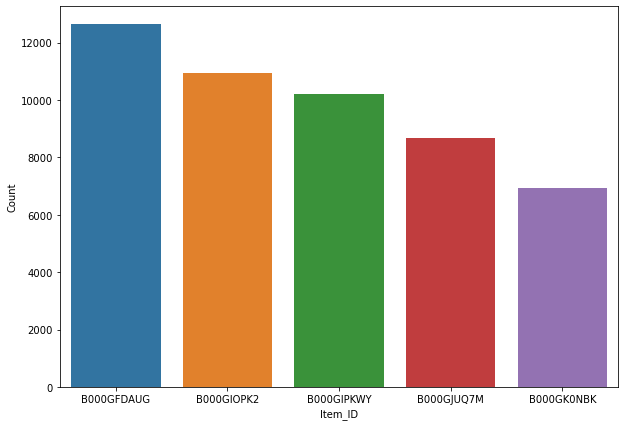

In [77]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_20_products_1['Item_ID'].head(5),y=top_20_products_1['Count'].head(5))

<AxesSubplot:xlabel='Item_ID', ylabel='Count'>

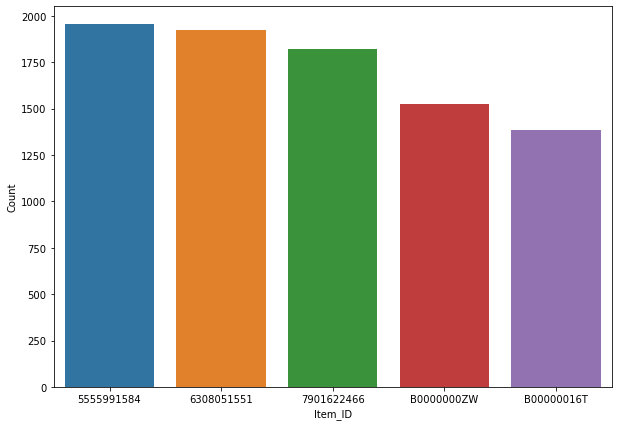

In [78]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_20_products_2['Item_ID'].head(5),y=top_20_products_2['Count'].head(5))

<AxesSubplot:xlabel='Item_ID', ylabel='Count'>

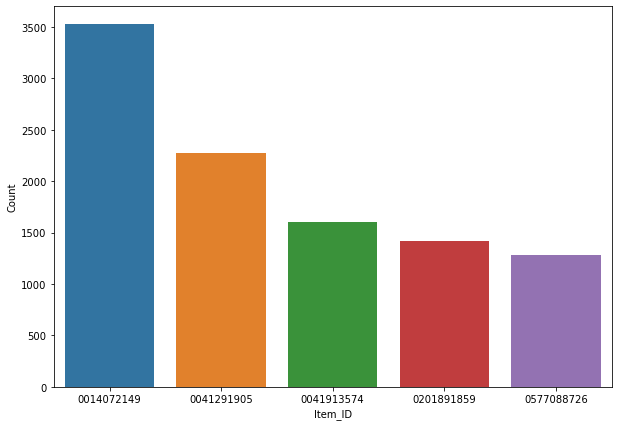

In [79]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_20_products_3['Item_ID'].head(5),y=top_20_products_3['Count'].head(5))

<AxesSubplot:xlabel='Item_ID', ylabel='Count'>

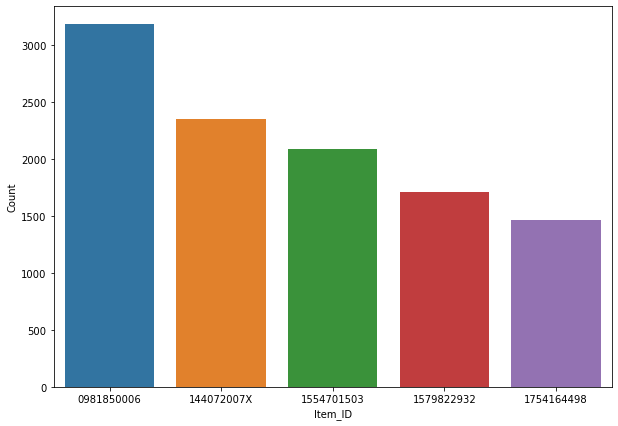

In [80]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_20_products_4['Item_ID'].head(5),y=top_20_products_4['Count'].head(5))

<AxesSubplot:xlabel='Item_ID', ylabel='Count'>

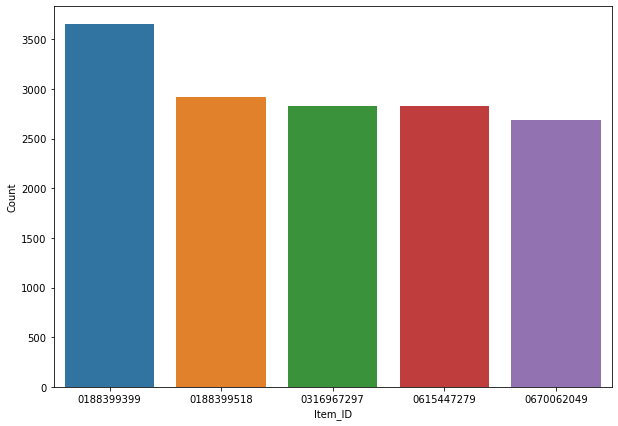

In [81]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_20_products_5['Item_ID'].head(5),y=top_20_products_5['Count'].head(5))

## Different types of ratings

In [82]:
print('Unique Ratings',df_1['Rating'].unique())

Unique Ratings [5. 4. 2. 1. 3.]


In [83]:
print('Unique Ratings',df_2['Rating'].unique())

Unique Ratings [5. 4. 3. 1. 2.]


In [84]:
print('Unique Ratings',df_3['Rating'].unique())

Unique Ratings [5. 1. 3. 2. 4.]


In [85]:
print('Unique Ratings',df_4['Rating'].unique())

Unique Ratings [5. 1. 3. 2. 4.]


In [86]:
print('Unique Ratings',df_5['Rating'].unique())

Unique Ratings [5. 4. 3. 2. 1.]


## Number Of Products with good ratings for each category

In [87]:
max_ratings1 = df_1[df_1['Rating'] >= 4.0]
print('Number of unique products rated high',len(max_ratings1['Item_ID'].unique()))

Number of unique products rated high 19653


In [88]:
max_ratings2 = df_2[df_2['Rating'] >= 4.0]
print('Number of unique products rated high',len(max_ratings2['Item_ID'].unique()))

Number of unique products rated high 249582


In [89]:
max_ratings3 = df_3[df_3['Rating'] >= 4.0]
print('Number of unique products rated high',len(max_ratings3['Item_ID'].unique()))

Number of unique products rated high 74603


In [90]:
max_ratings4 = df_4[df_4['Rating'] >= 4.0]
print('Number of unique products rated high',len(max_ratings4['Item_ID'].unique()))

Number of unique products rated high 90168


In [91]:
max_ratings5 = df_5[df_5['Rating'] >= 4.0]
print('Number of unique products rated high',len(max_ratings5['Item_ID'].unique()))

Number of unique products rated high 57218


# Phase 2 

In [92]:
from surprise import KNNBasic
from surprise import SVD
from surprise import NormalPredictor
from surprise import KNNBaseline
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split


In [93]:

reader = Reader(rating_scale=(0.5, 5.0))

## Collaborative filtering 

### Dataframe 1

In [94]:
userID1 = df_1.groupby('User_ID').count()
top_user1 = userID1[userID1['Rating'] >= 50].index

In [95]:
topuser_ratings_df1 = df_1[df_1['User_ID'].isin(top_user1)]

In [96]:
itemID1 = df_1.groupby('Item_ID').count()
top_prod1 = itemID1[itemID1['Rating'] >= 50].index

In [97]:
top_ratings_df1 = topuser_ratings_df1[topuser_ratings_df1['Item_ID'].isin(top_prod1)]

In [98]:
data1 = Dataset.load_from_df(top_ratings_df1[['User_ID', 'Item_ID', 'Rating']],reader)

In [99]:
from surprise.model_selection import train_test_split
trainset1, testset1 = train_test_split(data1, test_size=.3,random_state=0)

In [100]:
type(trainset1)

surprise.trainset.Trainset

In [101]:
algo_user1 = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user1.fit(trainset1)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [102]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset1)

In [103]:
test_pred1 = algo_user1.test(testset1)
test_pred1[0]

Prediction(uid='A2HVL790PBWYTU', iid='B002TWWOHE', r_ui=5.0, est=4.194444444444445, details={'actual_k': 0, 'was_impossible': False})

In [104]:
accuracy.rmse(test_pred1)

RMSE: 1.0086


1.0086323971676288

In [105]:
test_pred1 = svd_model.test(testset1)

In [106]:
accuracy.rmse(test_pred1)

RMSE: 0.9660


0.9660365359093823

In [107]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs1 = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [108]:
gs1.fit(data1)

In [109]:
gs1.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [110]:
gs1.test(testset1)
accuracy.rmse(gs1.test(testset1))

RMSE: 0.8244


0.824410892885576

### Dataframe 2

In [111]:
userID2 = df_2.groupby('User_ID').count()
top_user2 = userID2[userID2['Rating'] >= 50].index
topuser_ratings_df2 = df_2[df_2['User_ID'].isin(top_user2)]

In [112]:
itemID2 = df_2.groupby('Item_ID').count()
top_prod2 = itemID2[itemID2['Rating'] >= 50].index
top_ratings_df2 = topuser_ratings_df2[topuser_ratings_df2['Item_ID'].isin(top_prod2)]

In [113]:
data2 = Dataset.load_from_df(top_ratings_df2[['User_ID', 'Item_ID', 'Rating']],reader)

In [114]:
from surprise.model_selection import train_test_split
trainset2, testset2 = train_test_split(data2, test_size=.3,random_state=0)

In [115]:
algo_user2 = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user2.fit(trainset2)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [116]:
svd_model2 = SVD(n_factors=50,reg_all=0.02)
svd_model2.fit(trainset2)

In [117]:
test_pred2 = algo_user2.test(testset2)
test_pred2[0]

Prediction(uid='A2JAKHFYI88ZX0', iid='B00004NK9T', r_ui=5.0, est=4.555555555555555, details={'actual_k': 2, 'was_impossible': False})

In [118]:
accuracy.rmse(test_pred2)

RMSE: 0.8936


0.8935557882418115

In [119]:
test_pred2 = svd_model.test(testset2)

In [120]:
accuracy.rmse(test_pred2)

RMSE: 1.1190


1.118996367967629

In [121]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs2 = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [122]:
gs2.fit(data2)

In [123]:
gs2.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.01}}

In [124]:
gs2.test(testset2)
accuracy.rmse(gs2.test(testset2))

RMSE: 0.7495


0.7495250236656483

### Dataframe 3

In [125]:
userID3 = df_3.groupby('User_ID').count()
top_user3 = userID3[userID3['Rating'] >= 50].index
topuser_ratings_df3 = df_3[df_3['User_ID'].isin(top_user3)]

In [126]:
itemID3=df_3.groupby('Item_ID').count()
top_prod3= itemID3[itemID3['Rating']>=50].index
top_ratings_df3= topuser_ratings_df3[topuser_ratings_df3['Item_ID'].isin(top_prod3)]

In [127]:
data3 = Dataset.load_from_df(top_ratings_df3[['User_ID', 'Item_ID', 'Rating']],reader)

In [128]:
from surprise.model_selection import train_test_split
trainset3,testset3= train_test_split(data3,test_size=0.3,random_state=0)

In [129]:
algo_user3 = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user3.fit(trainset3)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [130]:
svd_model3 = SVD(n_factors=50,reg_all=0.02)
svd_model3.fit(trainset3)

In [131]:
test_pred3 = algo_user3.test(testset3)
test_pred3[0]

Prediction(uid='AZMHABTPXVLG3', iid='B001J5RYXQ', r_ui=3.0, est=4.57258064516129, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [132]:
accuracy.rmse(test_pred3)

RMSE: 0.7863


0.786321712812612

In [133]:
test_pred3 = svd_model.test(testset3)

In [134]:
accuracy.rmse(test_pred3)

RMSE: 1.0509


1.050925944662731

In [135]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs3 = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [136]:
gs3.fit(data3)

In [137]:
gs3.best_params

{'rmse': {'n_factors': 10, 'reg_all': 0.01}}

In [138]:
gs3.test(testset3)
accuracy.rmse(gs3.test(testset3))

RMSE: 0.6370


0.63703707287553

### Dataframe 4

In [139]:
userID4 = df_4.groupby('User_ID').count()
top_user4 = userID4[userID4['Rating'] >= 50].index
topuser_ratings_df4 = df_4[df_4['User_ID'].isin(top_user4)]

In [140]:
itemID4=df_4.groupby('Item_ID').count()
top_prod4= itemID4[itemID4['Rating']>=50].index
top_ratings_df4= topuser_ratings_df4[topuser_ratings_df4['Item_ID'].isin(top_prod4)]

In [141]:
data4 = Dataset.load_from_df(top_ratings_df4[['User_ID', 'Item_ID', 'Rating']],reader)

In [142]:
from surprise.model_selection import train_test_split
trainset4,testset4= train_test_split(data4,test_size=0.3,random_state=0)

In [143]:
algo_user4 = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user4.fit(trainset4)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [144]:
svd_model4 = SVD(n_factors=50,reg_all=0.02)
svd_model4.fit(trainset4)

In [145]:
test_pred4 = algo_user4.test(testset4)
test_pred4[0]

Prediction(uid='A3OXHLG6DIBRW8', iid='B000VC1AO2', r_ui=5.0, est=4.230434782608696, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [146]:
accuracy.rmse(test_pred4)

RMSE: 1.0571


1.0571305229747519

In [147]:
test_pred4 = svd_model.test(testset4)

In [148]:
accuracy.rmse(test_pred4)

RMSE: 1.1861


1.186059628539699

In [149]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs4 = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [150]:
gs4.fit(data4)

In [151]:
gs4.best_params

{'rmse': {'n_factors': 10, 'reg_all': 0.01}}

In [152]:
gs4.test(testset4)
accuracy.rmse(gs4.test(testset4))

RMSE: 0.9106


0.9105955404216152

### Dataframe 5

In [153]:
userID5 = df_5.groupby('User_ID').count()
top_user5 = userID5[userID5['Rating'] >= 50].index
topuser_ratings_df5 = df_5[df_5['User_ID'].isin(top_user5)]

In [154]:
itemID5=df_5.groupby('Item_ID').count()
top_prod5= itemID5[itemID5['Rating']>=50].index
top_ratings_df5= topuser_ratings_df5[topuser_ratings_df5['Item_ID'].isin(top_prod5)]

In [155]:
data5 = Dataset.load_from_df(top_ratings_df5[['User_ID', 'Item_ID', 'Rating']],reader)

In [156]:
from surprise.model_selection import train_test_split
trainset5,testset5= train_test_split(data5,test_size=0.3,random_state=0)

In [157]:
algo_user5 = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user5.fit(trainset5)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [158]:
svd_model5 = SVD(n_factors=50,reg_all=0.02)
svd_model5.fit(trainset5)

In [159]:
test_pred5=algo_user5.test(testset5)
test_pred5[0]

Prediction(uid='A3NXCL9NJTL3TF', iid='B00081J3N6', r_ui=4.0, est=3.774193548387097, details={'actual_k': 0, 'was_impossible': False})

In [160]:
accuracy.rmse(test_pred5)

RMSE: 1.0126


1.0125619905417795

In [161]:
test_pred5 = svd_model.test(testset5)

In [162]:
accuracy.rmse(test_pred5)

RMSE: 1.1382


1.1381810625600908

In [163]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs5 = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [164]:
gs5.fit(data5)

In [165]:
gs5.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [166]:
gs5.test(testset5)
accuracy.rmse(gs5.test(testset5))

RMSE: 0.8661


0.8661298798429009

## Splitting all the datasets into training and testing usig 80,20 split


In [167]:
from sklearn.model_selection import train_test_split
train_data1, test_data1 = train_test_split(top_ratings_df1, test_size = 0.20, random_state=0)

In [168]:
train_data1.head()

,User_ID,Item_ID,Rating
260361,AV6QDP8Q0ONK4,B008S9CU7G,3.0
236567,A3QLAOOTFEHCJI,B0087YQVY0,3.0
50514,AW3VZ5O895LRK,B001MVN03K,5.0
58190,A1POFVVXUZR3IQ,B002029Q4C,5.0
362063,AV6QDP8Q0ONK4,B00BN4V2YA,4.0


In [169]:
test_data1.head()

,User_ID,Item_ID,Rating
514135,A16XRPF40679KG,B00HNZHPGC,5.0
213219,ABO2ZI2Y5DQ9T,B007G5H2X0,2.0
13085,A1KIQ4P4ZW3ALF,B000MVN8HE,1.0
417267,AW3VZ5O895LRK,B00D5P0QMY,5.0
40786,AW3VZ5O895LRK,B001CH44YI,5.0


In [170]:
from sklearn.model_selection import train_test_split
train_data2, test_data2 = train_test_split(top_ratings_df2, test_size = 0.20, random_state=0)

In [171]:
train_data2.head()

,User_ID,Item_ID,Rating
641227,A3HU0B9XUEVHIM,B007F1Q7HC,5.0
214381,A13N40YR6UZFRW,B000B8QF00,1.0
3441,A23IOPI0D1OG7V,B00000064G,5.0
55682,A3SV72ZAHH2IDH,B000002L7G,5.0
5945,A3T9IX8EDFDX4G,B000000OPZ,4.0


In [172]:
test_data2.head()

,User_ID,Item_ID,Rating
675656,A14GK0E64J0WAS,B008JFC6F0,4.0
176459,A3W0POMI33YQXQ,B0000AGWFA,5.0
10094,A1XFNWGTPMG1AE,B0000013G5,5.0
165756,AGAMDS21PJZPK,B00008GQ9Y,4.0
69456,A461VTLW9G9YB,B000002TWN,5.0


In [173]:
from sklearn.model_selection import train_test_split
train_data3, test_data3 = train_test_split(top_ratings_df3, test_size = 0.20, random_state=0)

In [174]:
train_data3.head()

,User_ID,Item_ID,Rating
112534,A1YP96MT6W9FTB,B0009G1E0K,5.0
92423,A1L7M2JXN4EZCR,B0002T67J2,4.0
38678,A15TYOEWBQYF0X,B0002D0JZ6,5.0
310777,A2CJVLER896Q7L,B003DVGVIS,5.0
248995,A6FIAB28IS79,B001QWBM62,4.0


In [175]:
test_data3.head()

,User_ID,Item_ID,Rating
292866,A2EDYSY4M8TESS,B002X8Y4SQ,5.0
166416,A2FFJCRIYMCVCZ,B000OY4WA6,5.0
400878,A1MVH1WLYDHZ49,B005T800V2,4.0
43951,A1MVH1WLYDHZ49,B0002E1H9W,5.0
266625,A1QUIHLOSKDY7R,B0029F21LU,5.0


In [176]:
from sklearn.model_selection import train_test_split
train_data4, test_data4 = train_test_split(top_ratings_df4, test_size = 0.20, random_state=0)

In [177]:
train_data4.head()

,User_ID,Item_ID,Rating
241263,A35W3JQYP0M655,B000KKKDSE,4.0
977149,A3OXRFCJI67IMN,B00GTDIDBU,4.0
274931,AY3XPKRAMKKY7,B000P71GLU,5.0
510649,A1Z7FZP81N8CDU,B002JUOWB2,5.0
35398,A3OXRFCJI67IMN,B00004W430,5.0


In [178]:
test_data4.head()

,User_ID,Item_ID,Rating
757916,A2UO040HWOP0C2,B005BV0DD2,5.0
108037,A3OXHLG6DIBRW8,B0006OIZO8,4.0
13897,A35W3JQYP0M655,B00004RA3E,4.0
530139,A3L1VJMHFWONCB,B002U82A3K,5.0
548635,AZV26LP92E6WU,B002YNSADU,5.0


In [179]:
from sklearn.model_selection import train_test_split
train_data5, test_data5 = train_test_split(top_ratings_df5, test_size = 0.20, random_state=0)

In [180]:
train_data5.head()

,User_ID,Item_ID,Rating
743683,AZAC8O310IK4E,B006V84M1I,5.0
822953,A1RJTEOX6BJ1OP,B009IWNPXK,5.0
41388,AEK5GOE7UFP2P,B000069RAO,5.0
314002,AJGU56YG8G1DQ,B001C3KXPG,5.0
697130,AF8SREA2XE7BJ,B005IWM73S,3.0


In [181]:
test_data5.head()

,User_ID,Item_ID,Rating
693963,AJC88791BZEW7,B005G8L9MO,5.0
520012,A1XAYSI96X8YVH,B003CUXV0Q,5.0
343548,AKCZIJ6ZHE41D,B001HU2LDQ,5.0
532873,A3KHIBFERCW890,B003I8687A,5.0
749465,A26EQ8U96JA92T,B006ZBNE4M,5.0


## Popularity based recommendation

### Dataframe 1

In [182]:
train_data_grouped1 = train_data1.groupby('Item_ID').mean().reset_index()

In [183]:
train_data_grouped1.head()

,Item_ID,Rating
0,B000HAB4NK,5.0
1,B000I9S5BE,5.0
2,B000IJRK7O,5.0
3,B000IK882Y,5.0
4,B000J0Q1KO,5.0


In [184]:
train_data_sort1 = train_data_grouped1.sort_values(['Rating', 'Item_ID'], ascending=False)
train_data_sort1.head()

,Item_ID,Rating
447,B00L9MZFOO,5.0
444,B00KBN95IE,5.0
443,B00JXCZIFI,5.0
442,B00JWMPH14,5.0
439,B00JMJOWXG,5.0


In [185]:
train_data1.groupby('Item_ID')['Rating'].count().sort_values(ascending=False).head(10) 

Item_ID
B0044BY98K    9
B003A3PWFW    7
B00A0G14DQ    7
B004I90IW4    7
B00IKFSSTW    7
B009AP3HQK    6
B009IJJ5B4    5
B00944CJRK    5
B005DD7LR4    5
B00EEXPDTM    5
Name: Rating, dtype: int64

In [186]:
ratings_mean_count1 = pd.DataFrame(train_data1.groupby('Item_ID')['Rating'].mean()) 
ratings_mean_count1['rating_counts'] = pd.DataFrame(train_data1.groupby('Item_ID')['Rating'].count())  
ratings_mean_count1.head()  

,Rating,rating_counts
Item_ID,,
B000HAB4NK,5.0,1
B000I9S5BE,5.0,1
B000IJRK7O,5.0,1
B000IK882Y,5.0,2
B000J0Q1KO,5.0,1


In [187]:
pred_df1 = test_data1[['User_ID', 'Item_ID', 'Rating']]

In [188]:
pred_df1.rename(columns = {'Rating' : 'true_ratings'}, inplace=True)
pred_df1 = pred_df1.merge(train_data_sort1, left_on='Item_ID', right_on = 'Item_ID')
pred_df1.head(3)

,User_ID,Item_ID,true_ratings,Rating
0,A16XRPF40679KG,B00HNZHPGC,5.0,2.0
1,ABO2ZI2Y5DQ9T,B007G5H2X0,2.0,2.6
2,A1KIQ4P4ZW3ALF,B000MVN8HE,1.0,4.0


In [189]:
pred_df1.rename(columns = {'Rating' : 'predicted_ratings'}, inplace = True)
pred_df1.head()

,User_ID,Item_ID,true_ratings,predicted_ratings
0,A16XRPF40679KG,B00HNZHPGC,5.0,2.0
1,ABO2ZI2Y5DQ9T,B007G5H2X0,2.0,2.6
2,A1KIQ4P4ZW3ALF,B000MVN8HE,1.0,4.0
3,A1XT8AJB7S9JJG,B000MVN8HE,4.0,4.0
4,AW3VZ5O895LRK,B001CH44YI,5.0,4.0


In [190]:
import sklearn.metrics as metric
from math import sqrt
MSE1 = metric.mean_squared_error(pred_df1['true_ratings'], pred_df1['predicted_ratings'])
print('The RMSE value for Popularity Recommender model 1 is', sqrt(MSE1))

The RMSE value for Popularity Recommender model 1 is 1.2935056267517442


### Dataframe 2

In [191]:
train_data_grouped2 = train_data2.groupby('Item_ID').mean().reset_index()
train_data_grouped2.head()

,Item_ID,Rating
0,5555991584,4.833333
1,B00000016T,4.888889
2,B00000016W,4.550000
3,B00000017R,5.000000
4,B0000002ME,4.571429


In [192]:
train_data_sort2 = train_data_grouped2.sort_values(['Rating', 'Item_ID'], ascending=False)
train_data_sort2.head()

,Item_ID,Rating
1565,B00JTHVWO8,5.0
1558,B00J62YPZ4,5.0
1550,B00HWJX2R0,5.0
1548,B00HG24FWY,5.0
1544,B00GLQQ24A,5.0


In [193]:
train_data2.groupby('Item_ID')['Rating'].count().sort_values(ascending=False).head(10) 

Item_ID
B000N2G3RY    26
B000002LGQ    26
B0000025F7    26
B0000025RI    25
B000BNTM32    22
B000002AV5    22
B000001DZO    22
B0000013GH    21
B00003002C    21
B0000AGWFX    21
Name: Rating, dtype: int64

In [194]:
ratings_mean_count2 = pd.DataFrame(train_data2.groupby('Item_ID')['Rating'].mean()) 
ratings_mean_count2['rating_counts'] = pd.DataFrame(train_data2.groupby('Item_ID')['Rating'].count())  
ratings_mean_count2.head()  

,Rating,rating_counts
Item_ID,,
5555991584,4.833333,6
B00000016T,4.888889,9
B00000016W,4.550000,20
B00000017R,5.000000,3
B0000002ME,4.571429,7


In [195]:
pred_df2 = test_data2[['User_ID', 'Item_ID', 'Rating']]

In [196]:
pred_df2.rename(columns = {'Rating' : 'true_ratings'}, inplace=True)
pred_df2 = pred_df2.merge(train_data_sort2, left_on='Item_ID', right_on = 'Item_ID')
pred_df2.head(3)

,User_ID,Item_ID,true_ratings,Rating
0,A14GK0E64J0WAS,B008JFC6F0,4.0,5.0
1,AQV142R2H69QK,B008JFC6F0,5.0,5.0
2,A1OB5L3WMHJAD9,B008JFC6F0,3.0,5.0


In [197]:
pred_df2.rename(columns = {'Rating' : 'predicted_ratings'}, inplace = True)
pred_df2.head()

,User_ID,Item_ID,true_ratings,predicted_ratings
0,A14GK0E64J0WAS,B008JFC6F0,4.0,5.0
1,AQV142R2H69QK,B008JFC6F0,5.0,5.0
2,A1OB5L3WMHJAD9,B008JFC6F0,3.0,5.0
3,A3W0POMI33YQXQ,B0000AGWFA,5.0,4.0
4,AGAMDS21PJZPK,B0000AGWFA,5.0,4.0


In [198]:
import sklearn.metrics as metric
from math import sqrt
MSE2 = metric.mean_squared_error(pred_df2['true_ratings'], pred_df2['predicted_ratings'])
print('The RMSE value for Popularity Recommender model 2 is', sqrt(MSE2))

The RMSE value for Popularity Recommender model 2 is 1.0396600347949687


### Dataframe 3

In [199]:
train_data_grouped3= train_data3.groupby('Item_ID').mean().reset_index()
train_data_grouped3.head()

,Item_ID,Rating
0,1417030321,5.0
1,B00001W0DT,4.0
2,B00004UE29,5.0
3,B00004XQ83,5.0
4,B00005QZH2,5.0


In [200]:
train_data_sort3 = train_data_grouped3.sort_values(['Rating', 'Item_ID'], ascending=False)
train_data_sort3.head()

,Item_ID,Rating
322,B00IRVQ0F8,5.0
320,B00F2ATEDC,5.0
319,B00F0O8SZK,5.0
318,B00DR98EYK,5.0
316,B00CUS6J2I,5.0


In [201]:
train_data3.groupby('Item_ID')['Rating'].count().sort_values(ascending=False).head(10) 

Item_ID
B005FKF1PY    5
B0002E2KPC    5
B0002F7K7Y    5
B0016ZZKJO    4
B0002CZV82    4
B003VWJ2K8    4
B0002H0A3S    4
B0001FTVD6    3
B004FEGXDK    3
B0002F4VBM    3
Name: Rating, dtype: int64

In [202]:
ratings_mean_count3 = pd.DataFrame(train_data3.groupby('Item_ID')['Rating'].mean()) 
ratings_mean_count3['rating_counts'] = pd.DataFrame(train_data3.groupby('Item_ID')['Rating'].count())  
ratings_mean_count3.head()  

,Rating,rating_counts
Item_ID,,
1417030321,5.0,1
B00001W0DT,4.0,1
B00004UE29,5.0,1
B00004XQ83,5.0,2
B00005QZH2,5.0,1


In [203]:
pred_df3 = test_data3[['User_ID', 'Item_ID', 'Rating']]

In [204]:
pred_df3.rename(columns = {'Rating' : 'true_ratings'}, inplace=True)
pred_df3 = pred_df3.merge(train_data_sort3, left_on='Item_ID', right_on = 'Item_ID')
pred_df3.head(3)

,User_ID,Item_ID,true_ratings,Rating
0,A2EDYSY4M8TESS,B002X8Y4SQ,5.0,5.000000
1,A2FFJCRIYMCVCZ,B000OY4WA6,5.0,5.000000
2,A1MVH1WLYDHZ49,B005T800V2,4.0,4.666667


In [205]:
pred_df3.rename(columns = {'Rating' : 'predicted_ratings'}, inplace = True)
pred_df3.head()

,User_ID,Item_ID,true_ratings,predicted_ratings
0,A2EDYSY4M8TESS,B002X8Y4SQ,5.0,5.000000
1,A2FFJCRIYMCVCZ,B000OY4WA6,5.0,5.000000
2,A1MVH1WLYDHZ49,B005T800V2,4.0,4.666667
3,A1MVH1WLYDHZ49,B0002E1H9W,5.0,4.000000
4,A1S0HTDO0P4N5V,B000KGYAYQ,5.0,5.000000


In [206]:
import sklearn.metrics as metric
from math import sqrt
MSE3 = metric.mean_squared_error(pred_df3['true_ratings'], pred_df3['predicted_ratings'])
print('The RMSE value for Popularity Recommender model 3 is', sqrt(MSE3))

The RMSE value for Popularity Recommender model 3 is 0.9233656733205251


### Dataframe 4

In [207]:
train_data_grouped4= train_data4.groupby('Item_ID').mean().reset_index()
train_data_grouped4.head()

,Item_ID,Rating
0,B00002N66H,5.0
1,B00002N67Q,5.0
2,B00002N68C,5.0
3,B00002N6AN,4.0
4,B00004R9TK,5.0


In [208]:
train_data_sort4 = train_data_grouped4.sort_values(['Rating', 'Item_ID'], ascending=False)
train_data_sort4.head()

,Item_ID,Rating
414,B00IPL91M4,5.0
413,B00HXCPC6K,5.0
412,B00HUF0O2C,5.0
411,B00HK59L7Q,5.0
407,B00GSQ6HXO,5.0


In [209]:
train_data4.groupby('Item_ID')['Rating'].count().sort_values(ascending=False).head(10) 

Item_ID
B000A0VOD2    7
B0013FO2B4    7
B006DX16PQ    5
B000DZH3XO    5
B000BQRF60    5
B000XSF42S    5
B000NCWP44    4
B002YNSADU    4
B000BWY8KK    4
B000W9JN4S    4
Name: Rating, dtype: int64

In [210]:
ratings_mean_count4 = pd.DataFrame(train_data4.groupby('Item_ID')['Rating'].mean()) 
ratings_mean_count4['rating_counts'] = pd.DataFrame(train_data4.groupby('Item_ID')['Rating'].count())  
ratings_mean_count4.head()  

,Rating,rating_counts
Item_ID,,
B00002N66H,5.0,1
B00002N67Q,5.0,1
B00002N68C,5.0,1
B00002N6AN,4.0,1
B00004R9TK,5.0,1


In [211]:
pred_df4 = test_data4[['User_ID', 'Item_ID', 'Rating']]

In [212]:
pred_df4.rename(columns = {'Rating' : 'true_ratings'}, inplace=True)
pred_df4 = pred_df4.merge(train_data_sort4, left_on='Item_ID', right_on = 'Item_ID')
pred_df4.head(3)

,User_ID,Item_ID,true_ratings,Rating
0,AZV26LP92E6WU,B002YNSADU,5.0,4.25
1,A25C2M3QF9G7OQ,B002YNSADA,5.0,5.00
2,A1IWR4YH4ZA9BM,B003AYUWMO,5.0,4.00


In [213]:
pred_df4.rename(columns = {'Rating' : 'predicted_ratings'}, inplace = True)
pred_df4.head()

,User_ID,Item_ID,true_ratings,predicted_ratings
0,AZV26LP92E6WU,B002YNSADU,5.0,4.25
1,A25C2M3QF9G7OQ,B002YNSADA,5.0,5.00
2,A1IWR4YH4ZA9BM,B003AYUWMO,5.0,4.00
3,ABLOQZIL42W7I,B000BQYB0S,3.0,5.00
4,A100WO06OQR8BQ,B002XHJF9A,3.0,3.00


In [214]:
import sklearn.metrics as metric
from math import sqrt
MSE4 = metric.mean_squared_error(pred_df4['true_ratings'], pred_df4['predicted_ratings'])
print('The RMSE value for Popularity Recommender model 4 is', sqrt(MSE4))

The RMSE value for Popularity Recommender model 4 is 1.3184579794929328


### Dataframe 5

In [215]:
train_data_grouped5= train_data5.groupby('Item_ID').mean().reset_index()
train_data_grouped5.head()

,Item_ID,Rating
0,9729375011,5.0
1,B00000IZQI,4.0
2,B00002JV9S,4.0
3,B00003TL7P,5.0
4,B00003XAKP,4.0


In [216]:
train_data_sort5 = train_data_grouped5.sort_values(['Rating', 'Item_ID'], ascending=False)
train_data_sort5.head()

,Item_ID,Rating
1210,B00H6XPZN6,5.0
1203,B00G34TJWM,5.0
1202,B00G34TIKU,5.0
1201,B00G34TIAA,5.0
1200,B00FZGLKPI,5.0


In [217]:
train_data5.groupby('Item_ID')['Rating'].count().sort_values(ascending=False).head(10)

Item_ID
B000IDSLOG    12
B001QC3CKG    11
B0006FHBAQ     9
B00295MQLU     9
B001BMWABI     9
B000GJIE4E     9
B007SIZS18     8
B0042D69WY     8
B0067GKGFU     8
B00I6IGF4I     8
Name: Rating, dtype: int64

In [218]:
ratings_mean_count5 = pd.DataFrame(train_data5.groupby('Item_ID')['Rating'].mean()) 
ratings_mean_count5['rating_counts'] = pd.DataFrame(train_data5.groupby('Item_ID')['Rating'].count())  
ratings_mean_count5.head() 

,Rating,rating_counts
Item_ID,,
9729375011,5.0,2
B00000IZQI,4.0,1
B00002JV9S,4.0,1
B00003TL7P,5.0,2
B00003XAKP,4.0,2


In [219]:
pred_df5 = test_data5[['User_ID', 'Item_ID', 'Rating']]

In [220]:
pred_df5.rename(columns = {'Rating' : 'true_ratings'}, inplace=True)
pred_df5 = pred_df5.merge(train_data_sort5, left_on='Item_ID', right_on = 'Item_ID')
pred_df5.head(3)

,User_ID,Item_ID,true_ratings,Rating
0,AKCZIJ6ZHE41D,B001HU2LDQ,5.0,4.0
1,A3KHIBFERCW890,B003I8687A,5.0,5.0
2,A26EQ8U96JA92T,B006ZBNE4M,5.0,4.0


In [221]:
pred_df5.rename(columns = {'Rating' : 'predicted_ratings'}, inplace = True)
pred_df5.head()

,User_ID,Item_ID,true_ratings,predicted_ratings
0,AKCZIJ6ZHE41D,B001HU2LDQ,5.0,4.0
1,A3KHIBFERCW890,B003I8687A,5.0,5.0
2,A26EQ8U96JA92T,B006ZBNE4M,5.0,4.0
3,A1ZFUVIC4U6BGI,B0042D69UQ,5.0,5.0
4,A26WHR1IP0A250,B0031B5CEE,3.0,4.0


In [222]:
import sklearn.metrics as metric
from math import sqrt
MSE5 = metric.mean_squared_error(pred_df5['true_ratings'], pred_df5['predicted_ratings'])
print('The RMSE value for Popularity Recommender model 5 is', sqrt(MSE5))

The RMSE value for Popularity Recommender model 5 is 1.2574603650501626


## FastAPI Implementation

In [223]:
from fastapi import FastAPI
import uvicorn as uvicorn

In [224]:
app=FastAPI()
from collections import defaultdict

In [225]:
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        return top_n

    

In [242]:
top_n = get_top_n(test_pred1, n=5)
@app.post('/predict')
def prediction(uid):
    for uid, user_ratings in top_n.items():
        print(uid, [iid for (iid, _) in user_ratings])
    return uid

In [240]:
import nest_asyncio
nest_asyncio.apply()

In [241]:
if __name__ == "__main__":
    uvicorn.run(app, host='127.0.0.10', port=4000, debug=True)

INFO:     Started server process [28024]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.10:4000 (Press CTRL+C to quit)


INFO:     127.0.0.1:51537 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:51537 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:51537 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:51537 - "GET /openapi.json HTTP/1.1" 200 OK


C:\Users\priya\anaconda3\lib\site-packages\fastapi\openapi\utils.py:187: UserWarning: Duplicate Operation ID prediction_predict_post for function prediction
  warnings.warn(message)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [28024]


In [243]:
top_n = get_top_n(test_pred2, n=5)
@app.post('/predict')
def prediction(uid):
    for uid, user_ratings in top_n.items():
        print(uid, [iid for (iid, _) in user_ratings])
    return uid

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [244]:
if __name__ == "__main__":
    uvicorn.run(app, host='127.0.0.11', port=4000, debug=True)

INFO:     Started server process [28024]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.11:4000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [28024]


In [ ]:
top_n = get_top_n(test_pred3, n=5)
@app.post('/predict')
def prediction(uid):
    for uid, user_ratings in top_n.items():
        print(uid, [iid for (iid, _) in user_ratings])
    return uid

In [245]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
if __name__ == "__main__":
    uvicorn.run(app, host='127.0.0.12', port=4000, debug=True)

In [ ]:
top_n = get_top_n(test_pred4, n=5)
@app.post('/predict')
def prediction(uid):
    for uid, user_ratings in top_n.items():
        print(uid, [iid for (iid, _) in user_ratings])
    return uid

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
if __name__ == "__main__":
    uvicorn.run(app, host='127.0.0.13', port=4000, debug=True)

In [ ]:
top_n = get_top_n(test_pred5, n=5)
@app.post('/predict')
def prediction(uid):
    for uid, user_ratings in top_n.items():
        print(uid, [iid for (iid, _) in user_ratings])
    return uid

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
if __name__ == "__main__":
    uvicorn.run(app, host='127.0.0.14', port=4000, debug=True)